### **Fitting the yield curve**

In [1]:
# Loading packages
import numpy as np
import fixed_income_derivatives_E2025 as fid
import matplotlib.pyplot as plt

# Defining instruments and collecting in data
EURIBOR_fixing = [{"id": 0,"instrument": "libor","maturity": 1/2, "rate":0.00967}]
fra_market = [{"id": 1,"instrument": "fra","exercise": 1/12,"maturity": 7/12, "rate": 0.00980},
{"id": 2,"instrument": "fra","exercise": 2/12,"maturity": 8/12, "rate": 0.01043},
{"id": 3,"instrument": "fra","exercise": 3/12,"maturity": 9/12, "rate": 0.01130},
{"id": 4,"instrument": "fra","exercise": 4/12,"maturity": 10/12, "rate": 0.01217},
{"id": 5,"instrument": "fra","exercise": 5/12,"maturity": 11/12, "rate": 0.01317},
{"id": 6,"instrument": "fra","exercise": 6/12,"maturity": 12/12, "rate": 0.01399},
{"id": 7,"instrument": "fra","exercise": 7/12,"maturity": 13/12, "rate": 0.01478},
{"id": 8,"instrument": "fra","exercise": 8/12,"maturity": 14/12, "rate": 0.01560},
{"id": 9,"instrument": "fra","exercise": 9/12,"maturity": 15/12, "rate": 0.01637}]
swap_market = [{"id": 10,"instrument": "swap","maturity": 2, "rate": 0.01652, "float_freq": "semiannual", "fixed_freq": "annual","indices": []},
{"id": 11,"instrument": "swap","maturity": 3, "rate": 0.02019, "float_freq": "semiannual", "fixed_freq": "annual","indices": []},
{"id": 12,"instrument": "swap","maturity": 4, "rate": 0.02319, "float_freq": "semiannual", "fixed_freq": "annual","indices": []},
{"id": 13,"instrument": "swap","maturity": 5, "rate": 0.02577, "float_freq": "semiannual", "fixed_freq": "annual","indices": []},
{"id": 14,"instrument": "swap","maturity": 7, "rate": 0.02995, "float_freq": "semiannual", "fixed_freq": "annual","indices": []},
{"id": 15,"instrument": "swap","maturity": 10, "rate": 0.03395, "float_freq": "semiannual", "fixed_freq": "annual","indices": []},
{"id": 16,"instrument": "swap","maturity": 15, "rate": 0.03753, "float_freq": "semiannual", "fixed_freq": "annual","indices": []},
{"id": 17,"instrument": "swap","maturity": 20, "rate": 0.03873, "float_freq": "semiannual", "fixed_freq": "annual","indices": []},
{"id": 18,"instrument": "swap","maturity": 30, "rate": 0.03975, "float_freq": "semiannual", "fixed_freq": "annual","indices": []}]
data = EURIBOR_fixing + fra_market + swap_market

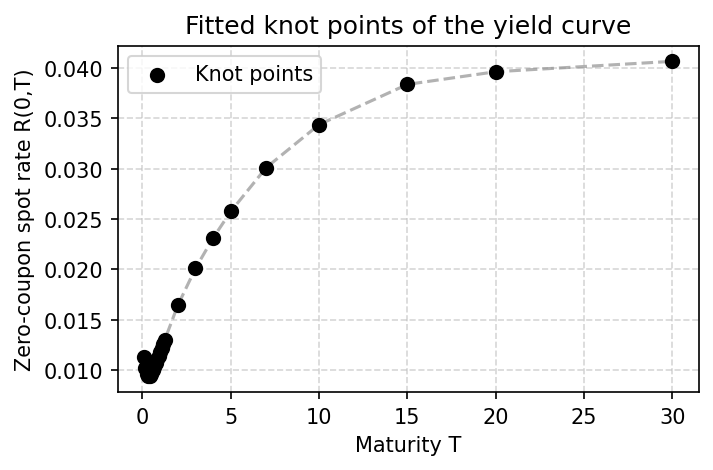

In [7]:
# We choose a hermite interpolation with a smooth transition.
interpolation_options = {"method":"hermite","degree":3,"transition": "smooth"}

# Problem 2a - Fitting a ZCB term structure to the market data.

# Choosing a mesh and number of points to interpolate over.
mesh = 1/12
M = 360
T_inter = np.array([i*mesh for i in range(0,M+1)])

# Fitting the yield curve (calibration to market instruments)
T_fit, R_fit = fid.zcb_curve_fit(data, interpolation_options=interpolation_options)

# T_fit contains the knot maturities (instrument maturities where the curve is anchored)
# R_fit contains the continuously compounded zero-coupon spot rates R(0, T_fit) at those knots

# Plotting the fitted yield curve
plt.figure(figsize=(5,3), dpi=150)

# Knot points
plt.scatter(T_fit, R_fit, color="black", s=40, zorder=3, label="Knot points")
plt.plot(T_fit, R_fit, linestyle="--", color="gray", alpha=0.6)

plt.xlabel("Maturity T")
plt.ylabel("Zero-coupon spot rate R(0,T)")
plt.title("Fitted knot points of the yield curve")
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend()

plt.show()


We know need to interpolate the spot rates etc.

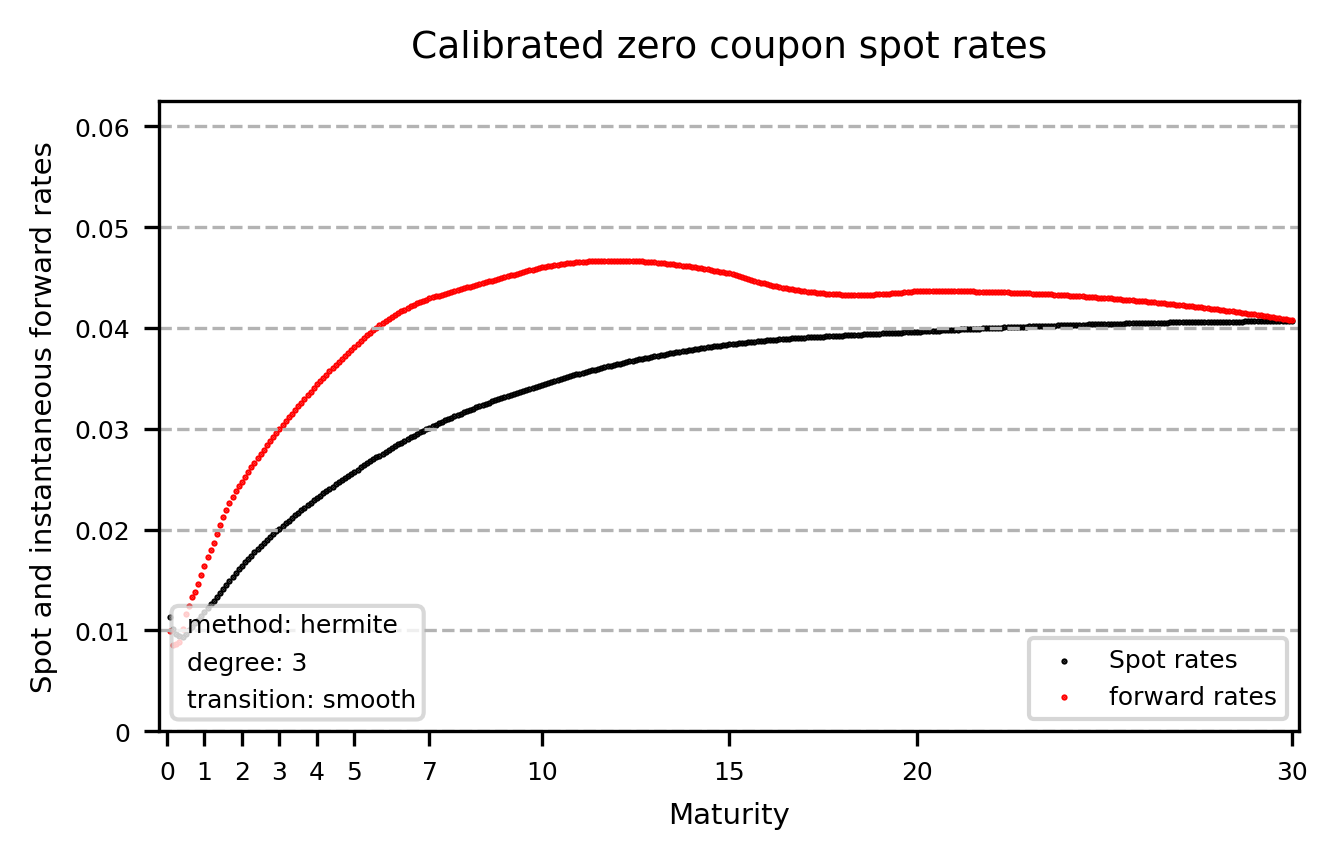

In [30]:

# Interpolating the yield curve
p_inter, R_inter, f_inter, T_inter = fid.zcb_curve_interpolate(T_inter,T_fit,R_fit,interpolation_options = interpolation_options)
# p_inter : ZCB prices p(0,T)
# R_inter : continuously compounded spot rates R(0,T)
# f_inter : instantaneous forward rates f(0,T)



fig = plt.figure(constrained_layout=False, dpi = 300, figsize = (5,3))
fig.suptitle(f"Calibrated zero coupon spot rates", fontsize = 9)
gs = fig.add_gridspec(nrows=1,ncols=1,left=0.12,bottom=0.2,right=0.88,top=0.90,wspace=0,hspace=0)
ax = fig.add_subplot(gs[0,0])
xticks = [0,1,2,3,4,5,7,10,15,20,30]
ax.set_xticks(xticks)
ax.set_xticklabels(xticks,fontsize = 6)
ax.set_xlim([xticks[0]+-0.2,xticks[-1]+0.2])
plt.xlabel(f"Maturity",fontsize = 7)
ax.set_yticks([0,0.01,0.02,0.03,0.04,0.05,0.06])
ax.set_yticklabels([0,0.01,0.02,0.03,0.04,0.05,0.06],fontsize = 6)
ax.set_ylim([0,0.0625])
ax.set_ylabel(f"Spot and instantaneous forward rates",fontsize = 7)
plt.grid(axis = 'y', which='major', color = (0.7,0.7,0.7,0), linestyle='--')
p1 = ax.scatter(T_inter[1:], R_inter[1:], s = 1, color = 'black', marker = ".",label="Spot rates")
p2 = ax.scatter(T_inter[1:], f_inter[1:], s = 1, color = 'red', marker = ".",label="forward rates")
plots = [p1,p2]
labels = [item.get_label() for item in plots]
ax.legend(plots,labels,loc="lower right",fontsize = 6)
bbox = {"facecolor": (1,1,1,0.8),"edgecolor": (0.7,0.7,0.7,0.5),"boxstyle": "Round"}
if interpolation_options["method"] == "hermite":
    ax.text(0.32,0.0024,f" method: {interpolation_options['method']} \n degree: {interpolation_options['degree']} \n transition: {interpolation_options['transition']}", fontsize = 6,linespacing = 1.7, bbox = bbox)
else:
    ax.text(0.32,0.0024,f" method: {interpolation_options['method']} \n transition: {interpolation_options['transition']}", fontsize = 6,linespacing = 1.7, bbox = bbox)
plt.show()



We have not fitted the yield zurbe and interpolated it. 

### **Prive swap and perform different stresstests**

In [26]:

# 5Y interest rate swap before shift

# Fixed-leg payment dates for a 5Y annual-pay swap: T_i = 1,2,3,4,5 (include 0 for day-count diffs)
T_5Y_swap_fixed_leg = np.array([i for i in range(0,6)])

# Discount factors p(0,T_i) from the interpolated ZCB curve
p_5Y_swap_fixed_leg = np.array(fid.for_values_in_list_find_value_return_value(T_5Y_swap_fixed_leg,T_inter,p_inter))

# Fixed-leg annuity S_5Y = sum_{i=1}^5 alpha_i p(0,T_i), with alpha_i = 1 here
S_5Y_swap = 0
for i in range(1,len(T_5Y_swap_fixed_leg)):
    S_5Y_swap += (T_5Y_swap_fixed_leg[i] - T_5Y_swap_fixed_leg[i-1])*p_5Y_swap_fixed_leg[i]

# Par swap rate: R_5Y = (1 - p(0,5)) / S_5Y

R_5Y_swap = (1-p_5Y_swap_fixed_leg[-1])/S_5Y_swap
print(f"5Y swap before changes. S_5Y_swap: {S_5Y_swap}, R_5Y_swap: {R_5Y_swap}")



5Y swap before changes. S_5Y_swap: 4.688311500676128, R_5Y_swap: 0.025770000000081925


The swap annuity **$S_{5Y} = 4.688312 $**  is the **present value today of receiving 1 per year for 5 years**, discounted using your calibrated yield curve. Thus Receiving 1% fixed per year for 5 years is worth 0.0469 today.
Given this discounting, the fixed rate that makes the swap fair is 2.577%.

### **Next we try to bump the entire ZCB curve by 1 bp**

We bump the calibrated zero-coupon spot-rate curve by $+1\text{ bp}=+0.0001$:
$R^{\text{bump}}(0,T)=R(0,T)+0.0001$ (for $T>0$), then recompute discount factors
$p^{\text{bump}}(0,T)=e^{-R^{\text{bump}}(0,T)\,T}$ and re-price the 5Y swap.

In [ ]:
# Shifting the entire spot rate zcb_curve by 1 bp
R_inter_zcb_shift = R_inter + np.array([0] + [0.0001 for i in range(1,len(R_inter))])

# Calculate the new ZCB prices
p_inter_zcb_shift = fid.zcb_prices_from_spot_rates(T_inter,R_inter_zcb_shift)

# Extract bumped ZCB prices at the fixed-leg payment dates
p_5Y_swap_fixed_leg_zcb_shift = np.array(fid.for_values_in_list_find_value_return_value(T_5Y_swap_fixed_leg,T_inter,p_inter_zcb_shift))

# Calculate the new 5Y swap annuity
S_5Y_swap_zcb_shift = 0
for i in range(1,len(T_5Y_swap_fixed_leg)):
    S_5Y_swap_zcb_shift += (T_5Y_swap_fixed_leg[i] - T_5Y_swap_fixed_leg[i-1])*p_5Y_swap_fixed_leg_zcb_shift[i]

# Calculate the new 5Y swap rate
R_5Y_swap_zcb_shift = (1-p_5Y_swap_fixed_leg_zcb_shift[-1])/S_5Y_swap_zcb_shift

# Calculate the DV01
print(f"5Y swap after shift in all ZCB spot rates. S_5Y_swap: {S_5Y_swap_zcb_shift}, R_5Y_swap: {R_5Y_swap_zcb_shift}, DV01: {S_5Y_swap_zcb_shift*(R_5Y_swap-R_5Y_swap_zcb_shift)*100}")


5Y swap after shift in all ZCB spot rates. S_5Y_swap: 4.686932677419535, R_5Y_swap: 0.025871348479965604, DV01: -0.04750135021736117


## Parallel spot-rate bump (1 bp): interpretation

**Swap annuity (accrual factor)**  
The fixed-leg annuity is
$S_{5Y}=\sum_{i=1}^{5}\alpha_i\,p(0,T_i)$ with annual payments $\alpha_i=1$.
Before bump: $S_{5Y}=4.688312$.  
After bump: $S^{\text{bump}}_{5Y}=4.686933$ (lower due to stronger discounting).

**Par swap rate**  
$R_{5Y}=\frac{1-p(0,5)}{S_{5Y}}$.
Before bump: $R_{5Y}=0.02577=2.5770\%$.  
After bump: $R^{\text{bump}}_{5Y}=0.02587135=2.5871\%$.

**DV01-style value change (from this parallel spot bump)**  
We approximate the value change via
$\Delta V \approx S^{\text{bump}}_{5Y}\big(R_{5Y}-R^{\text{bump}}_{5Y}\big)\times 100
= -0.04750$.

**Interpretation:** a parallel $+1$ bp rise in spot rates makes the position worth about $0.0475$ less per unit notional (negative sign: value falls when rates rise, consistent with receiving fixed / paying floating).


### **Shifting only the 5Y ZCB rate**


In [ ]:

# Shifting only the 5Y zcb rate

# Create a bump vector for the 5Y ZCB rate
R_bump_5Y = np.zeros([len(R_inter)])

# Apply the bump to the 5Y ZCB rate
R_bump_5Y[60] = 0.0001

# Apply the bump to the ZCB spot rate curve
R_inter_5Y_shift = R_inter + R_bump_5Y

# Calculate the new ZCB prices
p_inter_5Y_shift = fid.zcb_prices_from_spot_rates(T_inter,R_inter_5Y_shift)

# Extract bumped ZCB prices at the fixed-leg payment dates
p_5Y_swap_fixed_leg_5Y_shift = np.array(fid.for_values_in_list_find_value_return_value(T_5Y_swap_fixed_leg,T_inter,p_inter_5Y_shift))

# Calculate the new 5Y swap annuity
S_5Y_swap_5Y_shift = 0
for i in range(1,len(T_5Y_swap_fixed_leg)):
    S_5Y_swap_5Y_shift += (T_5Y_swap_fixed_leg[i] - T_5Y_swap_fixed_leg[i-1])*p_5Y_swap_fixed_leg_5Y_shift[i]

# Calculate the new 5Y swap rate
R_5Y_swap_5Y_shift = (1-p_5Y_swap_fixed_leg_5Y_shift[-1])/S_5Y_swap_5Y_shift

# Calculate the DV01
print(f"5Y swap after shift in only 5Y ZCB spot rate. S_5Y_swap: {S_5Y_swap_5Y_shift}, R_5Y_swap: {R_5Y_swap_5Y_shift}, DV01: {S_5Y_swap_5Y_shift*(R_5Y_swap-R_5Y_swap_5Y_shift)*100}")


5Y swap after shift in only 5Y ZCB spot rate. S_5Y_swap: 4.6878720194492765, R_5Y_swap: 0.025866164455126087, DV01: -0.04508066580671118



### Key-rate bump at $T=5$ (only)

We bump only the 5Y zero rate by $+1$ bp:
$R^{\text{bump}}(0,5)=R(0,5)+0.0001$, while $R^{\text{bump}}(0,T)=R(0,T)$ for $T\neq 5$.
We then recompute $p^{\text{bump}}(0,T)=e^{-R^{\text{bump}}(0,T)T}$, the annuity
$S^{\text{bump}}_{5Y}=\sum_{i=1}^{5}\alpha_i p^{\text{bump}}(0,T_i)$, and the par rate
$R^{\text{bump}}_{5Y}=\frac{1-p^{\text{bump}}(0,5)}{S^{\text{bump}}_{5Y}}$.

Numerically:
$S^{\text{bump}}_{5Y}=4.687872$, $R^{\text{bump}}_{5Y}=0.02586616$.
The DV01-style value change reported is
$\Delta V \approx S^{\text{bump}}_{5Y}(R_{5Y}-R^{\text{bump}}_{5Y})\times 100=-0.04508$.

Interpretation: bumping only the 5Y point produces almost the full swap sensitivity, confirming that a 5Y swap’s risk is concentrated near the long end (around $T=5$), though a parallel curve bump is slightly larger in magnitude.


### **Shifting the 5Y swap market rate**

In [ ]:

# Shifting the 5Y swap market rate

# Create a bump vector for the 5Y swap market rate
EURIBOR_fixing = [{"id": 0,"instrument": "libor","maturity": 1/2, "rate": 0.02869}]
fra_market = [
    {"id": 1,"instrument": "fra","exercise": 1/12,"maturity": 7/12, "rate": 0.03075},
    {"id": 2,"instrument": "fra","exercise": 2/12,"maturity": 8/12, "rate": 0.03273},
    {"id": 3,"instrument": "fra","exercise": 3/12,"maturity": 9/12, "rate": 0.03463},
    {"id": 4,"instrument": "fra","exercise": 4/12,"maturity": 10/12, "rate": 0.03645},
    {"id": 5,"instrument": "fra","exercise": 5/12,"maturity": 11/12, "rate": 0.03820},
    {"id": 6,"instrument": "fra","exercise": 6/12,"maturity": 12/12, "rate": 0.03988},
    {"id": 7,"instrument": "fra","exercise": 7/12,"maturity": 13/12, "rate": 0.04148},
    {"id": 8,"instrument": "fra","exercise": 8/12,"maturity": 14/12, "rate": 0.04302},
    {"id": 9,"instrument": "fra","exercise": 9/12,"maturity": 15/12, "rate": 0.04449}
]
swap_market_mr_shift = [
    {"id": 10,"instrument": "swap","maturity": 2, "rate": 0.04329, "float_freq": "semiannual", "fixed_freq": "annual","indices": []},
    {"id": 11,"instrument": "swap","maturity": 3, "rate": 0.04936, "float_freq": "semiannual", "fixed_freq": "annual","indices": []},
    {"id": 12,"instrument": "swap","maturity": 4, "rate": 0.05349, "float_freq": "semiannual", "fixed_freq": "annual","indices": []},
    {"id": 13,"instrument": "swap","maturity": 5, "rate": 0.05622 + 0.0001, "float_freq": "semiannual", "fixed_freq": "annual","indices": []}, # Here we bump the 5Y swap market rate by 1 bp
    {"id": 14,"instrument": "swap","maturity": 7, "rate": 0.05898, "float_freq": "semiannual", "fixed_freq": "annual","indices": []},
    {"id": 15,"instrument": "swap","maturity": 10, "rate": 0.05966, "float_freq": "semiannual", "fixed_freq": "annual","indices": []},
    {"id": 16,"instrument": "swap","maturity": 15, "rate": 0.05797, "float_freq": "semiannual", "fixed_freq": "annual","indices": []},
    {"id": 17,"instrument": "swap","maturity": 20, "rate": 0.05599, "float_freq": "semiannual", "fixed_freq": "annual","indices": []},
    {"id": 18,"instrument": "swap","maturity": 30, "rate": 0.05334, "float_freq": "semiannual", "fixed_freq": "annual","indices": []}
]
data_mr_shift = EURIBOR_fixing + fra_market + swap_market_mr_shift

# Fit the yield curve
T_fit_mr_shift, R_fit_mr_shift = fid.zcb_curve_fit(data_mr_shift,interpolation_options = interpolation_options)

# Interpolate the yield curve
T_inter_mr_shift = np.array([i*mesh for i in range(0,M+1)])
p_inter_mr_shift, R_inter_mr_shift, f_inter_mr_shift, T_inter_mr_shift = fid.zcb_curve_interpolate(T_inter_mr_shift,T_fit_mr_shift,R_fit_mr_shift,interpolation_options = interpolation_options)

# Extract bumped ZCB prices at the fixed-leg payment dates
p_5Y_swap_fixed_leg_mr_shift = np.array(fid.for_values_in_list_find_value_return_value(T_5Y_swap_fixed_leg,T_inter_mr_shift,p_inter_mr_shift))

# Calculate the new 5Y swap annuity
S_5Y_swap_mr_shift = 0
for i in range(1,len(T_5Y_swap_fixed_leg)):
    S_5Y_swap_mr_shift += (T_5Y_swap_fixed_leg[i] - T_5Y_swap_fixed_leg[i-1])*p_5Y_swap_fixed_leg_mr_shift[i]
R_5Y_swap_mr_shift = (1-p_5Y_swap_fixed_leg_mr_shift[-1])/S_5Y_swap_mr_shift
print(f"5Y swap after shift in 5Y swap market rate. S_5Y_swap: {S_5Y_swap_mr_shift}, R_5Y_swap: {R_5Y_swap_mr_shift}, DV01: {S_5Y_swap_mr_shift*(R_5Y_swap-R_5Y_swap_mr_shift)*100}")



5Y swap after shift in 5Y swap market rate. S_5Y_swap: 4.6878544923328604, R_5Y_swap: 0.025870000000093363, DV01: -0.046878544928690646
